<h2>Data Preparation</h2>
<h3>Importing Libraries</h3>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
data=pd.read_csv('spam.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data=data[['v1','v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h3>Class Distribution</h3>

<AxesSubplot:ylabel='v1'>

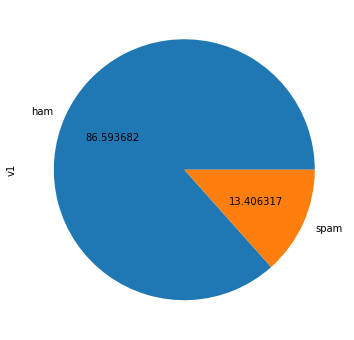

In [5]:
data['v1'].value_counts().plot(kind='pie',figsize=(12,6),autopct="%f")

In [49]:
data['v1'].value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [50]:
4825/747

6.459170013386881

The distribution is not uniform (a ratio of 1:6) and this is a case of imbalanced classification. Hence we will look at AUC values and Precision, Recall values to select the best model.

<h2>Lemmatizing</h2>

In [6]:
def prepare_data(df):
    data=df['v2']
    useless_words=list(stopwords.words('english'))+list(punctuation)
    
    lemmatizer=WordNetLemmatizer()
    corpus=data.tolist()
    final_corpus=[]
    
    for i in range(len(corpus)):
        word=word_tokenize(corpus[i].lower())
        word=[
            lemmatizer.lemmatize(y) for y in word if y not in useless_words
        ]
        j=" ".join(word)
        final_corpus.append(j)
    
    return final_corpus

In [7]:
final_corpus=prepare_data(data)

le=LabelEncoder()
data['v1']=le.fit_transform(data['v1'])

train_df={
    'content':final_corpus,
    'labels':data['v1']
}

train_df=pd.DataFrame(train_df)
train_df.head()

,content,labels
0,go jurong point crazy .. available bugis n gre...,0
1,ok lar ... joking wif u oni ...,0
2,free entry 2 wkly comp win fa cup final tkts 2...,1
3,u dun say early hor ... u c already say ...,0
4,nah n't think go usf life around though,0


<h3>Vectorization</h3>

In [8]:
tf=TfidfVectorizer()
vector=tf.fit_transform(train_df['content'])
x=vector.toarray()
y=train_df['labels']

x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<h3>Train Test Split</h3>

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y)
    

<h2>Model Building</h2>
<h3>Comparing Models</h3>

In [11]:
model_names=['Multinomial Naive Bayes','Logistic Regression','SVC','Decision Tree Classifier','Cat Boost Classifier','XGB Classifier','Random Forest Classifier']
model=[MultinomialNB(),LogisticRegression(class_weight='balanced'),SVC(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced'),CatBoostClassifier(),xgb.XGBClassifier(),RandomForestClassifier(class_weight='balanced')]

def get_results(model_names,model,x_train,x_test,y_train,y_test):
    
    
    model_accuracy_score=[]
    model_auc_score=[]
    
    for i in model:
        model_=i.fit(x_train,y_train)
        y_preds=model_.predict(x_test)
        
        score1=accuracy_score(y_test,y_preds)
        score2=roc_auc_score(y_test,y_preds,)
        
        model_accuracy_score.append(score1)
        model_auc_score.append(score2)
    
    result={
        'Model':model_names,
        'AUC Score': model_auc_score,
        'Accuracy Score': model_accuracy_score
    }
    
    result=pd.DataFrame(result)
    
    return result

In [12]:
comp_df=get_results(model_names,model,X_train,X_test,Y_train,Y_test)

Learning rate set to 0.018973
0:	learn: 0.6693574	total: 221ms	remaining: 3m 41s
1:	learn: 0.6475569	total: 276ms	remaining: 2m 17s
2:	learn: 0.6260621	total: 330ms	remaining: 1m 49s
3:	learn: 0.6077623	total: 375ms	remaining: 1m 33s
4:	learn: 0.5913560	total: 419ms	remaining: 1m 23s
5:	learn: 0.5728606	total: 457ms	remaining: 1m 15s
6:	learn: 0.5564328	total: 498ms	remaining: 1m 10s
7:	learn: 0.5397947	total: 528ms	remaining: 1m 5s
8:	learn: 0.5236693	total: 556ms	remaining: 1m 1s
9:	learn: 0.5074088	total: 583ms	remaining: 57.7s
10:	learn: 0.4926941	total: 613ms	remaining: 55.1s
11:	learn: 0.4787153	total: 641ms	remaining: 52.8s
12:	learn: 0.4654866	total: 667ms	remaining: 50.7s
13:	learn: 0.4534191	total: 694ms	remaining: 48.9s
14:	learn: 0.4435073	total: 721ms	remaining: 47.3s
15:	learn: 0.4333338	total: 749ms	remaining: 46.1s
16:	learn: 0.4211816	total: 776ms	remaining: 44.9s
17:	learn: 0.4121627	total: 804ms	remaining: 43.9s
18:	learn: 0.4019882	total: 832ms	remaining: 43s
19:	le

166:	learn: 0.1112943	total: 5.15s	remaining: 25.7s
167:	learn: 0.1111117	total: 5.18s	remaining: 25.6s
168:	learn: 0.1107871	total: 5.21s	remaining: 25.6s
169:	learn: 0.1105224	total: 5.24s	remaining: 25.6s
170:	learn: 0.1102319	total: 5.28s	remaining: 25.6s
171:	learn: 0.1098934	total: 5.32s	remaining: 25.6s
172:	learn: 0.1096215	total: 5.35s	remaining: 25.6s
173:	learn: 0.1091744	total: 5.38s	remaining: 25.5s
174:	learn: 0.1088424	total: 5.41s	remaining: 25.5s
175:	learn: 0.1086374	total: 5.44s	remaining: 25.5s
176:	learn: 0.1083789	total: 5.47s	remaining: 25.4s
177:	learn: 0.1082353	total: 5.5s	remaining: 25.4s
178:	learn: 0.1080851	total: 5.53s	remaining: 25.3s
179:	learn: 0.1076647	total: 5.55s	remaining: 25.3s
180:	learn: 0.1073895	total: 5.58s	remaining: 25.3s
181:	learn: 0.1071018	total: 5.61s	remaining: 25.2s
182:	learn: 0.1069513	total: 5.64s	remaining: 25.2s
183:	learn: 0.1067497	total: 5.67s	remaining: 25.1s
184:	learn: 0.1066150	total: 5.7s	remaining: 25.1s
185:	learn: 0.

329:	learn: 0.0838519	total: 10.5s	remaining: 21.3s
330:	learn: 0.0837730	total: 10.5s	remaining: 21.3s
331:	learn: 0.0837233	total: 10.6s	remaining: 21.3s
332:	learn: 0.0836581	total: 10.6s	remaining: 21.3s
333:	learn: 0.0835625	total: 10.6s	remaining: 21.2s
334:	learn: 0.0834933	total: 10.7s	remaining: 21.2s
335:	learn: 0.0834061	total: 10.7s	remaining: 21.2s
336:	learn: 0.0833281	total: 10.7s	remaining: 21.1s
337:	learn: 0.0832684	total: 10.8s	remaining: 21.1s
338:	learn: 0.0829904	total: 10.8s	remaining: 21.1s
339:	learn: 0.0829374	total: 10.8s	remaining: 21s
340:	learn: 0.0828863	total: 10.9s	remaining: 21s
341:	learn: 0.0828305	total: 10.9s	remaining: 21s
342:	learn: 0.0825585	total: 10.9s	remaining: 20.9s
343:	learn: 0.0824959	total: 11s	remaining: 20.9s
344:	learn: 0.0824417	total: 11s	remaining: 20.9s
345:	learn: 0.0822441	total: 11s	remaining: 20.8s
346:	learn: 0.0821963	total: 11.1s	remaining: 20.8s
347:	learn: 0.0821462	total: 11.1s	remaining: 20.8s
348:	learn: 0.0820850	to

494:	learn: 0.0707275	total: 15.6s	remaining: 15.9s
495:	learn: 0.0705422	total: 15.7s	remaining: 15.9s
496:	learn: 0.0704737	total: 15.7s	remaining: 15.9s
497:	learn: 0.0702327	total: 15.7s	remaining: 15.8s
498:	learn: 0.0701723	total: 15.7s	remaining: 15.8s
499:	learn: 0.0701105	total: 15.8s	remaining: 15.8s
500:	learn: 0.0700691	total: 15.8s	remaining: 15.7s
501:	learn: 0.0700277	total: 15.8s	remaining: 15.7s
502:	learn: 0.0698176	total: 15.9s	remaining: 15.7s
503:	learn: 0.0697604	total: 15.9s	remaining: 15.7s
504:	learn: 0.0695977	total: 15.9s	remaining: 15.6s
505:	learn: 0.0693490	total: 16s	remaining: 15.6s
506:	learn: 0.0693063	total: 16s	remaining: 15.6s
507:	learn: 0.0692389	total: 16s	remaining: 15.5s
508:	learn: 0.0691968	total: 16.1s	remaining: 15.5s
509:	learn: 0.0691564	total: 16.1s	remaining: 15.5s
510:	learn: 0.0688935	total: 16.1s	remaining: 15.4s
511:	learn: 0.0688439	total: 16.2s	remaining: 15.4s
512:	learn: 0.0687977	total: 16.2s	remaining: 15.4s
513:	learn: 0.0687

655:	learn: 0.0577221	total: 20.8s	remaining: 10.9s
656:	learn: 0.0576923	total: 20.8s	remaining: 10.9s
657:	learn: 0.0576634	total: 20.9s	remaining: 10.9s
658:	learn: 0.0576187	total: 20.9s	remaining: 10.8s
659:	learn: 0.0575892	total: 20.9s	remaining: 10.8s
660:	learn: 0.0575605	total: 21s	remaining: 10.8s
661:	learn: 0.0575328	total: 21s	remaining: 10.7s
662:	learn: 0.0573444	total: 21s	remaining: 10.7s
663:	learn: 0.0572980	total: 21.1s	remaining: 10.7s
664:	learn: 0.0572695	total: 21.1s	remaining: 10.6s
665:	learn: 0.0571660	total: 21.1s	remaining: 10.6s
666:	learn: 0.0569722	total: 21.2s	remaining: 10.6s
667:	learn: 0.0569439	total: 21.2s	remaining: 10.5s
668:	learn: 0.0569156	total: 21.2s	remaining: 10.5s
669:	learn: 0.0568872	total: 21.3s	remaining: 10.5s
670:	learn: 0.0568593	total: 21.3s	remaining: 10.4s
671:	learn: 0.0567770	total: 21.3s	remaining: 10.4s
672:	learn: 0.0567334	total: 21.4s	remaining: 10.4s
673:	learn: 0.0566906	total: 21.4s	remaining: 10.4s
674:	learn: 0.0566

815:	learn: 0.0485129	total: 26.4s	remaining: 5.94s
816:	learn: 0.0484160	total: 26.4s	remaining: 5.91s
817:	learn: 0.0482582	total: 26.4s	remaining: 5.88s
818:	learn: 0.0482372	total: 26.5s	remaining: 5.85s
819:	learn: 0.0482149	total: 26.5s	remaining: 5.82s
820:	learn: 0.0481940	total: 26.5s	remaining: 5.79s
821:	learn: 0.0481729	total: 26.6s	remaining: 5.75s
822:	learn: 0.0481519	total: 26.6s	remaining: 5.72s
823:	learn: 0.0481309	total: 26.6s	remaining: 5.69s
824:	learn: 0.0481103	total: 26.7s	remaining: 5.66s
825:	learn: 0.0480896	total: 26.7s	remaining: 5.62s
826:	learn: 0.0480552	total: 26.7s	remaining: 5.59s
827:	learn: 0.0480233	total: 26.8s	remaining: 5.56s
828:	learn: 0.0478799	total: 26.8s	remaining: 5.53s
829:	learn: 0.0478591	total: 26.8s	remaining: 5.49s
830:	learn: 0.0478385	total: 26.9s	remaining: 5.46s
831:	learn: 0.0478180	total: 26.9s	remaining: 5.43s
832:	learn: 0.0477973	total: 26.9s	remaining: 5.4s
833:	learn: 0.0477272	total: 26.9s	remaining: 5.36s
834:	learn: 0

976:	learn: 0.0415548	total: 32.2s	remaining: 757ms
977:	learn: 0.0414508	total: 32.2s	remaining: 725ms
978:	learn: 0.0414250	total: 32.2s	remaining: 692ms
979:	learn: 0.0414087	total: 32.3s	remaining: 659ms
980:	learn: 0.0413941	total: 32.3s	remaining: 626ms
981:	learn: 0.0413683	total: 32.3s	remaining: 593ms
982:	learn: 0.0413524	total: 32.4s	remaining: 560ms
983:	learn: 0.0412173	total: 32.4s	remaining: 527ms
984:	learn: 0.0411914	total: 32.4s	remaining: 494ms
985:	learn: 0.0411755	total: 32.5s	remaining: 461ms
986:	learn: 0.0410322	total: 32.5s	remaining: 428ms
987:	learn: 0.0410162	total: 32.6s	remaining: 395ms
988:	learn: 0.0410003	total: 32.6s	remaining: 362ms
989:	learn: 0.0409846	total: 32.6s	remaining: 330ms
990:	learn: 0.0408812	total: 32.7s	remaining: 297ms
991:	learn: 0.0408657	total: 32.7s	remaining: 264ms
992:	learn: 0.0408502	total: 32.7s	remaining: 231ms
993:	learn: 0.0408259	total: 32.7s	remaining: 198ms
994:	learn: 0.0407744	total: 32.8s	remaining: 165ms
995:	learn: 

C:\Users\sahay\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:23:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<h2>Comparision</h2>

In [13]:
comp_df

,Model,AUC Score,Accuracy Score
0,Multinomial Naive Bayes,0.852778,0.961953
1,Logistic Regression,0.927150,0.972003
2,SVC,0.905143,0.974874
3,Decision Tree Classifier,0.922401,0.955492
4,Cat Boost Classifier,0.905556,0.975592
5,XGB Classifier,0.931685,0.979899
6,Random Forest Classifier,0.900000,0.974156


<h3>Selecting : <ul><li>XGB Classifier</li><li>Logistic Regressor</li></ul><br>Based on their auc values.</h3>

In [38]:
def get_scores(model):
    model.fit(X_train,Y_train)
    y_preds=model.predict(X_test)
    auc_score=roc_auc_score(Y_test,y_preds)
    classif_=classification_report(Y_test,y_preds)
    acc_score=accuracy_score(Y_test,y_preds)
    print('='*25,'CLASSIFICATION REPORT','='*25)
    print(classif_)
    print('\n\nAUC SCORE:',auc_score)
    print('\n\nAccuracy:',acc_score)
    

In [48]:
print('='*50,'XGBOOST CLASSIFIER','='*50)
get_scores(xgb.XGBClassifier())

print('='*50,'LOGISTIC REGRESSION','='*50)
get_scores(LogisticRegression(class_weight='balanced'))

================================================== XGBOOST CLASSIFIER ==================================================
[23:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
========================= CLASSIFICATION REPORT =========================
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1213
           1       0.97      0.87      0.92       180

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



AUC SCORE: 0.9316845287166804


Accuracy: 0.9798994974874372
================================================== LOGISTIC REGRESSION ==================================

Selecting XGBClassifier as it gives the best auc score along with 98% and 97% precision for both classes and recall of 100% and 87%.

<h2>Generating Word Clouds</h2>

In [51]:
!pip install wordcloud

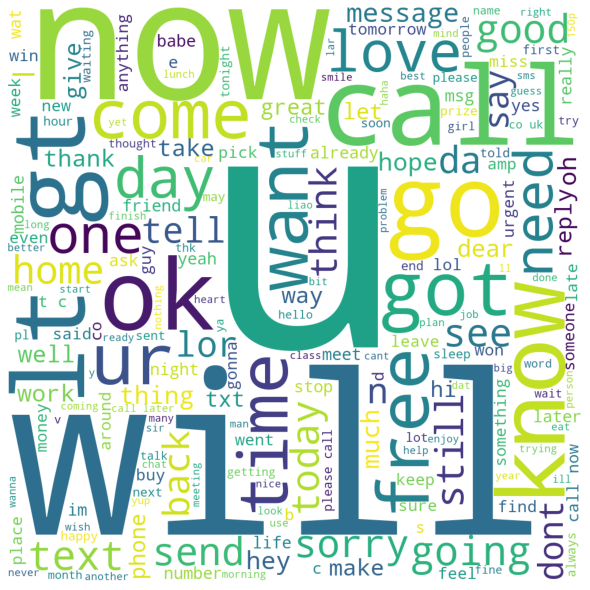

In [52]:
from wordcloud import WordCloud,STOPWORDS

stopwords=set(STOPWORDS)
comment_words=""

for val in data['v2']:
    tokens=str(val).split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    
    comment_words+=" ".join(tokens)+" "

wordcloud=WordCloud(width=1000,height=1000,background_color='white',stopwords=stopwords,min_font_size=10).generate(comment_words)

plt.figure(figsize=(15,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<h3>Ham Class Word Cloud</h3>

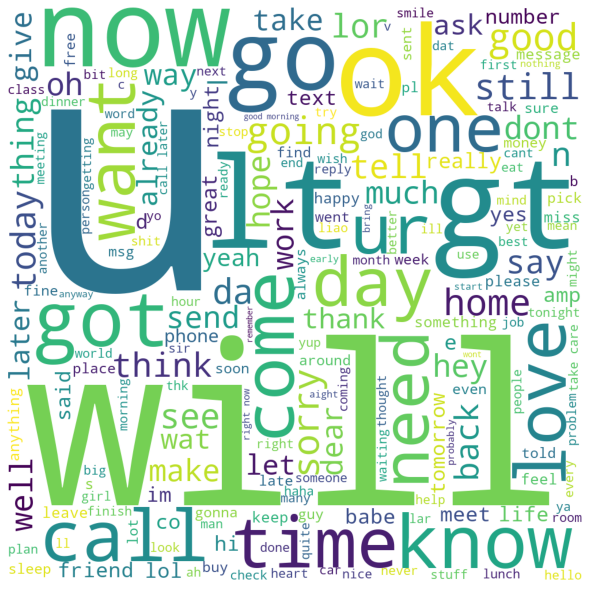

In [64]:
comment_words_1=""
comment_words_2=""

for val in range(len(data['v1'])):
    if data['v1'][val]==0:
        tokens=str(data['v2'][val]).split()
        for i in range(len(tokens)):
            tokens[i]=tokens[i].lower()
    
        comment_words_1+=" ".join(tokens)+" "
    else:
        tokens=str(data['v2'][val]).split()
        for i in range(len(tokens)):
            tokens[i]=tokens[i].lower()
    
        comment_words_2+=" ".join(tokens)+" "
        
wordcloud=WordCloud(width=1000,height=1000,background_color='white',stopwords=stopwords,min_font_size=10).generate(comment_words_1)

plt.figure(figsize=(15,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<h3>Spam Class Word Cloud</h3>

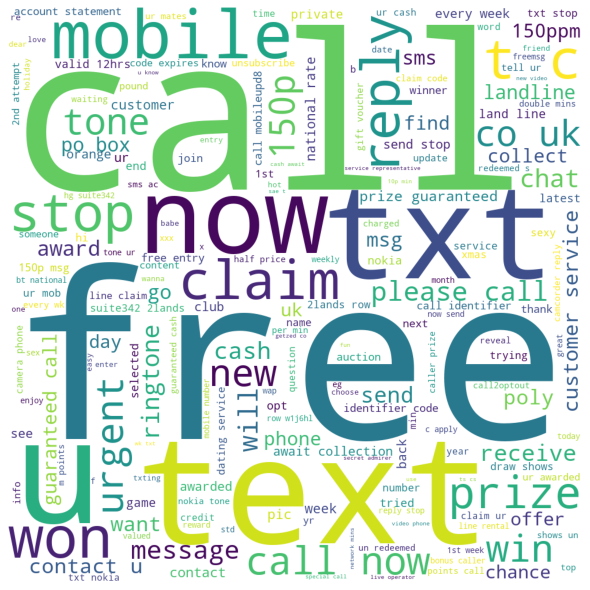

In [65]:
        
wordcloud=WordCloud(width=1000,height=1000,background_color='white',stopwords=stopwords,min_font_size=10).generate(comment_words_2)

plt.figure(figsize=(15,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()